In [199]:
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as f
import torch.optim as optim

In [200]:
df1 = pd.read_csv("/content/data_set1.csv")
df1.sample(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1185,33,Private,292603,Some-college,10,Divorced,Other-service,Not-in-family,Black,Female,0,0,30,Dominican-Republic,49208
45,28,Private,242832,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,36,United-States,53425
112,29,Private,337266,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,No
61,39,Private,118429,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,51633
829,50,Private,148431,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,51725
978,44,Private,110028,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,27828,0,60,United-States,60404
182,28,?,168524,HS-grad,9,Married-civ-spouse,?,Own-child,White,Female,0,0,38,United-States,Yes


In [201]:
df1.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [202]:
df1 = pd.get_dummies(df1,columns=['workclass','education','marital-status','occupation','relationship','race','gender','native-country'])

In [203]:
df1.sample(7)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_United-States,native-country_Vietnam
999,36,180278,13,0,0,40,57687,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1281,36,32086,10,7298,0,40,51455,0,0,0,...,0,0,0,0,0,0,0,0,1,0
814,71,28865,9,0,0,15,51923,0,0,0,...,0,0,0,0,0,0,0,0,1,0
748,37,241633,13,0,0,45,65070,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1221,53,53833,10,0,0,32,53702,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1038,35,77792,9,0,0,40,51203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
684,34,344073,9,5013,0,40,57584,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [204]:
df1.income.value_counts()

Yes      108
No       104
48000     80
83000      9
54504      4
        ... 
55895      1
57923      1
58932      1
56910      1
58327      1
Name: income, Length: 691, dtype: int64

In [205]:
df1['income'].replace(['Yes','No'],[58327,0],inplace=True)

In [206]:
df1.sample(7)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_United-States,native-country_Vietnam
812,21,152200,10,0,0,40,76176,0,0,1,...,0,0,0,0,0,0,0,0,1,0
294,23,316841,10,0,0,40,52349,0,0,0,...,0,0,0,0,0,0,0,0,1,0
530,28,349751,13,2174,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
481,31,174789,13,0,0,40,54899,0,0,0,...,0,0,0,0,0,0,0,0,1,0
836,26,186463,10,0,0,40,58327,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1253,35,252217,8,0,0,40,48000,0,0,1,...,0,0,0,0,0,0,0,0,1,0
663,24,131220,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.drop('income',axis=1), df1['income'], test_size=0.2, random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,sep="\n")

x_train = x_train.values
x_test = x_test.values

(1054, 95)
(264, 95)
(1054,)
(264,)


In [208]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# y_train = y_train.values.reshape(-1,1)
# y_train = torch.FloatTensor(y_train)
# y_test = y_test.values.reshape(-1,1)
# y_test = torch.FloatTensor(y_test)

In [209]:
y_train = y_train.astype(np.float32)
y_train = torch.FloatTensor(y_train)

y_test = y_test.astype(np.float32)
y_test = y_test.values.reshape(-1,1)
y_test = torch.FloatTensor(y_test)

In [210]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,sep="\n")

torch.Size([1054, 95])
torch.Size([264, 95])
torch.Size([1054])
torch.Size([264, 1])


# Model 1

In [211]:
class regres_nn(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(95, 69)
    self.l2 = nn.Linear(69, 43)
    self.l3 = nn.Linear(43, 10)
    self.l4 = nn.Linear(10, 1)

  def forward(self, x):
    x = f.relu(self.l1(x))
    x = f.relu(self.l2(x))
    x = f.relu(self.l3(x))
    x = self.l4(x)
    return x


In [212]:
#model
torch.manual_seed(30)
main_model1 = regres_nn()

criterion = nn.MSELoss()
optim1 = optim.Adam(main_model1.parameters(),lr=0.01)

In [213]:
batch = 110
epoch = 90

losses = []

for i in range(epoch):
  y_pred = main_model1.forward(x_train)

  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if(i%5==0):
    print(f'loss:{loss}')


  optim1.zero_grad()
  loss.backward()
  optim1.step()


loss:3467187968.0
loss:1624784768.0
loss:1438052224.0


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1054])) that is different to the input size (torch.Size([1054, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss:1220801152.0
loss:1142025472.0
loss:1139705216.0
loss:1061512448.0
loss:1093799296.0
loss:1066367296.0
loss:1062147584.0
loss:1066716672.0
loss:1059343808.0
loss:1058297280.0
loss:1058769088.0
loss:1057020032.0
loss:1055865344.0
loss:1055444032.0
loss:1054811200.0


In [214]:
y_pred = main_model1.forward(x_test)

y_pred = y_pred.detach().numpy().reshape(1,-1).tolist()[0]
y_pred

[47933.703125,
 46123.05078125,
 94167.3359375,
 30461.142578125,
 16426.412109375,
 62931.50390625,
 45270.21875,
 33957.3671875,
 71807.2421875,
 39084.8125,
 12315.5546875,
 65418.796875,
 71474.90625,
 41235.18359375,
 71361.8984375,
 55474.1796875,
 76794.53125,
 67244.3046875,
 44648.44921875,
 41041.3671875,
 69601.9296875,
 60830.4921875,
 44994.66015625,
 30111.224609375,
 6718.77001953125,
 29415.189453125,
 46005.82421875,
 28476.232421875,
 17960.697265625,
 20413.951171875,
 24535.49609375,
 41575.55859375,
 34080.58203125,
 35870.890625,
 17393.1796875,
 31080.666015625,
 46494.05078125,
 30267.73046875,
 17456.423828125,
 27915.25390625,
 43348.421875,
 54889.4921875,
 60944.33203125,
 24723.9453125,
 31840.775390625,
 22845.98828125,
 64650.3984375,
 53835.15234375,
 64392.18359375,
 28342.1484375,
 24103.2890625,
 49117.8515625,
 19482.11328125,
 47279.76953125,
 40757.14453125,
 54733.65234375,
 59419.90234375,
 48189.984375,
 25733.564453125,
 41266.359375,
 40630.72

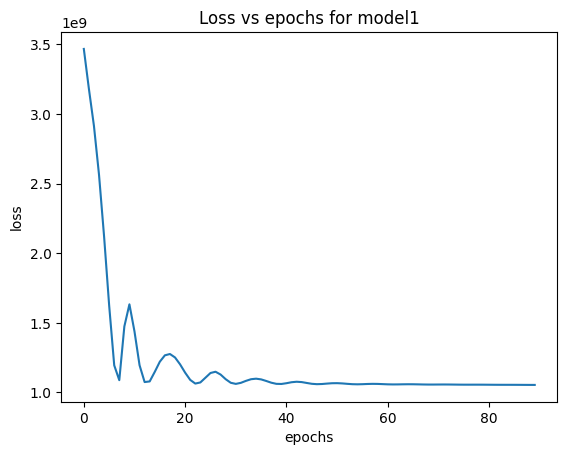

In [215]:

import matplotlib.pyplot as plt
plt.plot(range(epoch),losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs epochs for model1')
plt.show()


# Model2

In [216]:
class regres_nn2(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(95, 69)
    self.l2 = nn.Linear(69, 43)
    self.l4 = nn.Linear(43, 1)

  def forward(self, x):
    x = f.relu(self.l1(x))
    x = f.celu(self.l2(x))
    x = self.l4(x)
    return x


main_model2 = regres_nn2()


In [217]:
batch = 90
epoch = 110

losses = []

for i in range(epoch):
  y_pred = main_model2.forward(x_train)

  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if(i%5==0):
    print(f'loss:{loss}')


  optim1.zero_grad()
  loss.backward()
  optim1.step()


loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0
loss:3565436416.0


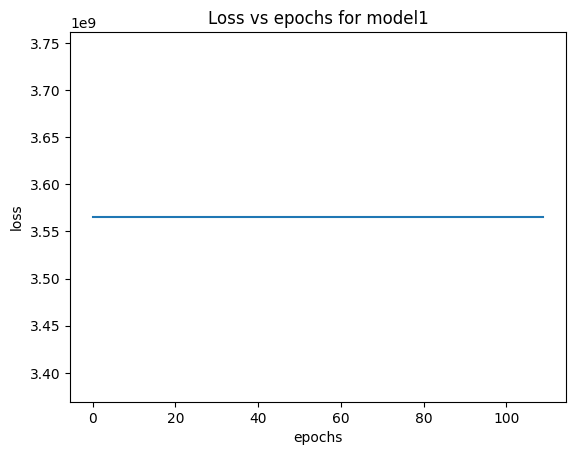

In [218]:
plt.plot(range(epoch),losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs epochs for model1')
plt.show()


In [ ]:
y_pred2 = main_model2.forward(x_test)

y_pred2 = y_pred2.detach().numpy().reshape(1,-1).tolist()[0]
y_pred2

In [220]:

y_pred = main_model1.forward(x_test)
y_pred = y_pred.detach().numpy().reshape(1,-1).tolist()[0]

y_pred2 = main_model2.forward(x_test)
y_pred2 = y_pred2.detach().numpy().reshape(1,-1).tolist()[0]

from sklearn.metrics import mean_absolute_error
print(f'main_model1 mae:{mean_absolute_error(y_test,y_pred)}')
print(f'main_model2 mae:{mean_absolute_error(y_test,y_pred2)}')


main_model1 mae:24588.984547008167
main_model2 mae:57561.66786806511
